# Downloading the Gravitational Waves dataset from Kaggle,

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paruljain1358","key":"b202741147f5d94998e349743db70a71"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tentotheminus9/gravity-spy-gravitational-waves

100% 3.88G/3.89G [01:13<00:00, 63.7MB/s]
100% 3.89G/3.89G [01:13<00:00, 57.1MB/s]


In [ ]:
!ls

gravity-spy-gravitational-waves.zip  kaggle.json  sample_data


In [ ]:
! mkdir data
! unzip gravity-spy-gravitational-waves.zip -d data

# Exploring the data,

In [ ]:
import pandas as pd
df= pd.read_csv('/content/data/trainingset_v1d1_metadata.csv')
df.head()

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,search,process_id,event_id,peak_frequency,central_freq,bandwidth,channel,amplitude,snr,confidence,chisq,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type,url1,url2,url3,url4
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,Omicron,0,21,1337.695312,1120.043213,573.363953,GDS-CALIB_STRAIN,1.197650e-22,7.51139,0,0,0,phase,-2.72902,zmIdpucyOG,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,Omicron,0,107,654.747681,1823.073364,3426.576416,GDS-CALIB_STRAIN,8.255850e-23,9.63013,0,0,0,phase,1.10682,zWFRqqDxwv,Whistle,test,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,Omicron,0,218,1337.827515,2024.177490,3778.701904,GDS-CALIB_STRAIN,9.762940e-22,15.37104,0,0,0,phase,-0.83099,zKCTakFVcf,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,Omicron,0,88,1182.974609,3981.774658,7492.717773,GDS-CALIB_STRAIN,1.462120e-22,10.32116,0,0,0,phase,0.76242,z14BdoiFZS,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,Omicron,0,16,1456.511353,3979.026855,7942.912109,GDS-CALIB_STRAIN,4.038300e-22,14.38016,0,0,0,phase,-0.31161,yyjqLCtAmO,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...


In [ ]:
df.shape

(7966, 28)

In [ ]:
df.columns

Index(['event_time', 'ifo', 'peak_time', 'peak_time_ns', 'start_time',
       'start_time_ns', 'duration', 'search', 'process_id', 'event_id',
       'peak_frequency', 'central_freq', 'bandwidth', 'channel', 'amplitude',
       'snr', 'confidence', 'chisq', 'chisq_dof', 'param_one_name',
       'param_one_value', 'gravityspy_id', 'label', 'sample_type', 'url1',
       'url2', 'url3', 'url4'],
      dtype='object')

In [ ]:
df.isna().sum() #checking for missing values

event_time         0
ifo                0
peak_time          0
peak_time_ns       0
start_time         0
start_time_ns      0
duration           0
search             0
process_id         0
event_id           0
peak_frequency     0
central_freq       0
bandwidth          0
channel            0
amplitude          0
snr                0
confidence         0
chisq              0
chisq_dof          0
param_one_name     0
param_one_value    0
gravityspy_id      0
label              0
sample_type        0
url1               0
url2               0
url3               0
url4               0
dtype: int64

In [ ]:
df['search'].value_counts()

Omicron    7368
OMICRON     598
Name: search, dtype: int64

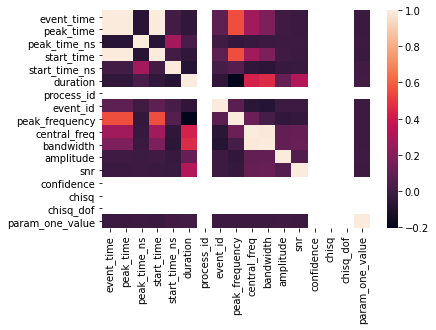

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr= df.corr()
corr= sns.heatmap(corr)

In [ ]:
df.columns

Index(['event_time', 'ifo', 'peak_time', 'peak_time_ns', 'start_time',
       'start_time_ns', 'duration', 'search', 'process_id', 'event_id',
       'peak_frequency', 'central_freq', 'bandwidth', 'channel', 'amplitude',
       'snr', 'confidence', 'chisq', 'chisq_dof', 'param_one_name',
       'param_one_value', 'gravityspy_id', 'label', 'sample_type', 'url1',
       'url2', 'url3', 'url4'],
      dtype='object')

In [ ]:
df['label'].value_counts()

Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Low_Frequency_Lines     447
Extremely_Loud          447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
None_of_the_Above        81
1400Ripples              81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: label, dtype: int64

# Bar plot of frequencies of various Gravitational wave classes,

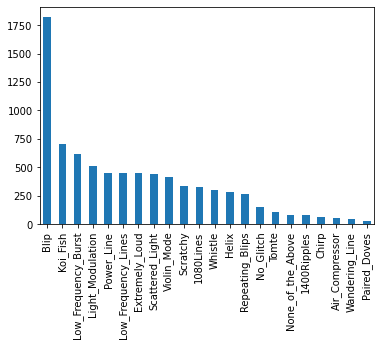

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
df.drop(columns=['url1','url2','url3','url4','search'],axis=1,inplace=True)
df

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,process_id,event_id,peak_frequency,central_freq,bandwidth,channel,amplitude,snr,confidence,chisq,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,0,21,1337.695312,1120.043213,573.363953,GDS-CALIB_STRAIN,1.197650e-22,7.511390,0,0,0,phase,-2.72902,zmIdpucyOG,Whistle,train
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,0,107,654.747681,1823.073364,3426.576416,GDS-CALIB_STRAIN,8.255850e-23,9.630130,0,0,0,phase,1.10682,zWFRqqDxwv,Whistle,test
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,0,218,1337.827515,2024.177490,3778.701904,GDS-CALIB_STRAIN,9.762940e-22,15.371040,0,0,0,phase,-0.83099,zKCTakFVcf,Whistle,train
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,0,88,1182.974609,3981.774658,7492.717773,GDS-CALIB_STRAIN,1.462120e-22,10.321160,0,0,0,phase,0.76242,z14BdoiFZS,Whistle,validation
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,0,16,1456.511353,3979.026855,7942.912109,GDS-CALIB_STRAIN,4.038300e-22,14.380160,0,0,0,phase,-0.31161,yyjqLCtAmO,Whistle,validation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,1.127688e+09,L1,1127688297,710937023,1127688292,0,9.00391,0,182,41.940331,1972.764160,3881.528320,GDS-CALIB_STRAIN,2.120510e-19,1033.286987,0,0,0,phase,-2.48491,K4lUik19zL,Extremely_Loud,train
7962,1.128422e+09,L1,1128421736,324218034,1128421736,304687023,0.03906,0,396,134.965424,202.500534,170.593903,GDS-CALIB_STRAIN,5.184990e-22,8.623000,0,0,0,phase,1.32651,EkRSkrpPet,Helix,validation
7963,1.164774e+09,H1,1164773536,433593034,1164773535,911376953,1.16675,0,1817,1085.830078,4001.193115,7898.579102,GDS-CALIB_STRAIN,4.994010e-22,19.424089,0,0,0,phase,2.72929,xyLhvRKzzX,1080Lines,train
7964,1.163790e+09,L1,1163789867,496093034,1163789867,476562023,0.10156,0,501,1035.676880,2051.402832,2131.378662,GDS-CALIB_STRAIN,2.744010e-22,8.651070,0,0,0,phase,0.66486,lshKvhcRcT,Violin_Mode,train


In [ ]:
df['ifo'].value_counts()

H1    4798
L1    3168
Name: ifo, dtype: int64

In [ ]:
df['process_id'].value_counts()

0    7966
Name: process_id, dtype: int64

In [ ]:
df['channel'].value_counts()

GDS-CALIB_STRAIN    7966
Name: channel, dtype: int64

In [ ]:
df['param_one_name'].value_counts()

phase    7966
Name: param_one_name, dtype: int64

In [ ]:
df['gravityspy_id'].value_counts()

mUGBFQ81i0    1
XjcZXbc26N    1
JL88oe7jGM    1
ZszPZe0MNn    1
kRf9xTRCJp    1
             ..
H6o3VNhL6B    1
coLlB8ImDg    1
9JWqwZnnCa    1
ozXYhsjaDc    1
pcZY4mMBLh    1
Name: gravityspy_id, Length: 7966, dtype: int64

In [ ]:
df.drop(columns=['param_one_name','channel','process_id',],axis=1,inplace=True)
df

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,event_id,peak_frequency,central_freq,bandwidth,amplitude,snr,confidence,chisq,chisq_dof,param_one_value,gravityspy_id,label,sample_type
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,21,1337.695312,1120.043213,573.363953,1.197650e-22,7.511390,0,0,0,-2.72902,zmIdpucyOG,Whistle,train
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,107,654.747681,1823.073364,3426.576416,8.255850e-23,9.630130,0,0,0,1.10682,zWFRqqDxwv,Whistle,test
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,218,1337.827515,2024.177490,3778.701904,9.762940e-22,15.371040,0,0,0,-0.83099,zKCTakFVcf,Whistle,train
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,88,1182.974609,3981.774658,7492.717773,1.462120e-22,10.321160,0,0,0,0.76242,z14BdoiFZS,Whistle,validation
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,16,1456.511353,3979.026855,7942.912109,4.038300e-22,14.380160,0,0,0,-0.31161,yyjqLCtAmO,Whistle,validation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,1.127688e+09,L1,1127688297,710937023,1127688292,0,9.00391,182,41.940331,1972.764160,3881.528320,2.120510e-19,1033.286987,0,0,0,-2.48491,K4lUik19zL,Extremely_Loud,train
7962,1.128422e+09,L1,1128421736,324218034,1128421736,304687023,0.03906,396,134.965424,202.500534,170.593903,5.184990e-22,8.623000,0,0,0,1.32651,EkRSkrpPet,Helix,validation
7963,1.164774e+09,H1,1164773536,433593034,1164773535,911376953,1.16675,1817,1085.830078,4001.193115,7898.579102,4.994010e-22,19.424089,0,0,0,2.72929,xyLhvRKzzX,1080Lines,train
7964,1.163790e+09,L1,1163789867,496093034,1163789867,476562023,0.10156,501,1035.676880,2051.402832,2131.378662,2.744010e-22,8.651070,0,0,0,0.66486,lshKvhcRcT,Violin_Mode,train


In [ ]:
df['confidence'].value_counts()

0    7966
Name: confidence, dtype: int64

In [ ]:
df['chisq'].value_counts()

0    7966
Name: chisq, dtype: int64

In [ ]:
df['chisq_dof'].value_counts()

0    7966
Name: chisq_dof, dtype: int64

In [ ]:
df.drop(columns=['confidence','chisq','chisq_dof'],axis=1,inplace=True)
df

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,event_id,peak_frequency,central_freq,bandwidth,amplitude,snr,param_one_value,gravityspy_id,label,sample_type
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,21,1337.695312,1120.043213,573.363953,1.197650e-22,7.511390,-2.72902,zmIdpucyOG,Whistle,train
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,107,654.747681,1823.073364,3426.576416,8.255850e-23,9.630130,1.10682,zWFRqqDxwv,Whistle,test
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,218,1337.827515,2024.177490,3778.701904,9.762940e-22,15.371040,-0.83099,zKCTakFVcf,Whistle,train
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,88,1182.974609,3981.774658,7492.717773,1.462120e-22,10.321160,0.76242,z14BdoiFZS,Whistle,validation
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,16,1456.511353,3979.026855,7942.912109,4.038300e-22,14.380160,-0.31161,yyjqLCtAmO,Whistle,validation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,1.127688e+09,L1,1127688297,710937023,1127688292,0,9.00391,182,41.940331,1972.764160,3881.528320,2.120510e-19,1033.286987,-2.48491,K4lUik19zL,Extremely_Loud,train
7962,1.128422e+09,L1,1128421736,324218034,1128421736,304687023,0.03906,396,134.965424,202.500534,170.593903,5.184990e-22,8.623000,1.32651,EkRSkrpPet,Helix,validation
7963,1.164774e+09,H1,1164773536,433593034,1164773535,911376953,1.16675,1817,1085.830078,4001.193115,7898.579102,4.994010e-22,19.424089,2.72929,xyLhvRKzzX,1080Lines,train
7964,1.163790e+09,L1,1163789867,496093034,1163789867,476562023,0.10156,501,1035.676880,2051.402832,2131.378662,2.744010e-22,8.651070,0.66486,lshKvhcRcT,Violin_Mode,train


# Preprocessing the images,

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_dir = '/content/data/train/train/'
test_dir = '/content/data/test/test'
validation_dir = '/content/data/validation/validation'

class_names = os.listdir(train_dir)

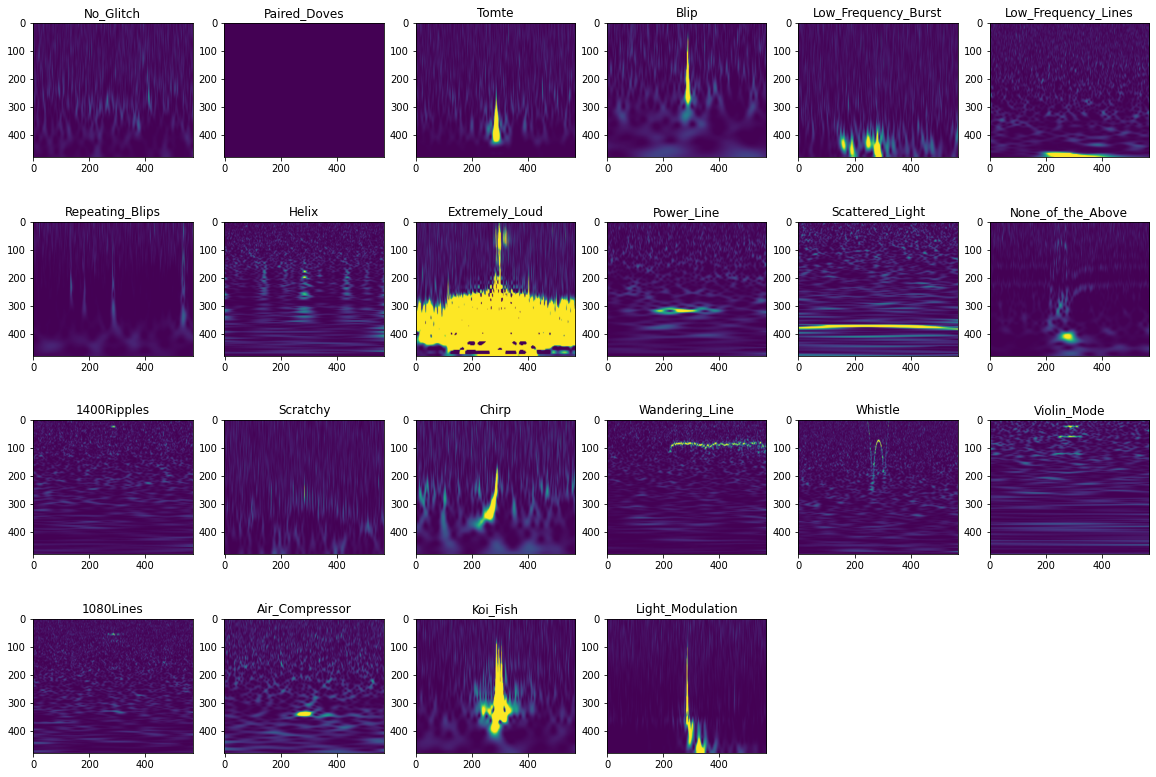

In [ ]:
# Preprocessing

plt.figure(figsize=(20,14))
for fold, i in zip(class_names,range(0,len(class_names))):

    plt.subplot(4,6, i+1)
    img_read = plt.imread(train_dir+fold+'/'+os.listdir(train_dir+fold)[0])
    plt.imshow(img_read)
    plt.title(class_names[i])
    
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Batch_size = 128

tr_gen = ImageDataGenerator(rescale = 1./255.,
                           samplewise_center=True,
                           samplewise_std_normalization=True)

val_gen =  ImageDataGenerator(rescale = 1./255.,
                           samplewise_center=True,
                           samplewise_std_normalization=True)

ts_gen =  ImageDataGenerator(rescale = 1./255.,
                           samplewise_center=True,
                           samplewise_std_normalization=True)

In [ ]:
tr_gen = tr_gen.flow_from_directory(train_dir,
                                  batch_size=Batch_size,
                                  classes=class_names,
                                  class_mode='categorical',
                                  shuffle=True,
                                  target_size=(100,100),
                                  seed= 42)

Found 22348 images belonging to 22 classes.


In [ ]:
val_gen = val_gen.flow_from_directory(validation_dir,
                                      batch_size=Batch_size,
                                      classes=class_names,
                                      class_mode='categorical',
                                      shuffle=True,
                                      target_size=(100,100),
                                      seed= 42)

Found 4800 images belonging to 22 classes.


In [ ]:
ts_gen = ts_gen.flow_from_directory(test_dir,
                                  batch_size=Batch_size,
                                  classes=class_names,
                                  class_mode='categorical',
                                  shuffle=False,
                                  target_size=(100,100),
                                  seed= 42)

Found 4720 images belonging to 22 classes.


In [ ]:
import cv2
import os
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image = mpimg.imread(image_path)     
            image = rgb2gray(image)    
            image=cv2.resize(image, (100,100),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

# Creating the training, validation and test sets

In [ ]:
X_list = create_dataset(train_dir) # Execution time: 12 min 

In [ ]:
X_val_list= create_dataset(validation_dir) # Execution time: 2-3 min

In [ ]:
def create_dataset_1(img_folder):
   
    img_data_array_1=[]
    class_name_1=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image = mpimg.imread(image_path)     
            image = rgb2gray(image)   
            image=cv2.resize(image, (100,100),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array_1.append(image)
            class_name_1.append(dir1)
    return img_data_array_1, class_name_1

In [ ]:
X_test_list = create_dataset_1(test_dir) # Execution time: 2-3 min

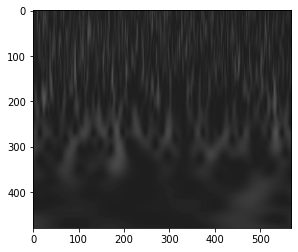

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('/content/data/validation/validation/No_Glitch/H1_0TNlunzbAI_spectrogram_0.5.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [ ]:
X_train= X_list[0]
y_train= X_list[1]
X_test= X_test_list[0]
y_test= X_test_list[1]

In [ ]:
X_val= X_val_list[0]
y_val= X_val_list[1]

In [ ]:
X_train_array= np.array(X_train)
X_test_array= np.array(X_test)
X_train_array.shape, X_test_array.shape

((22348, 100, 100), (4720, 100, 100))

In [ ]:
X_val_array= np.array(X_val)
y_train_array= np.array(y_train)
y_test_array= np.array(y_test)
y_val_array= np.array(y_val)
y_train_array.shape

(22348,)

In [ ]:
X_train_array= X_train_array.reshape(22348,100,100,1)
X_val_array= X_val_array.reshape(4800,100,100,1)
X_test_array= X_test_array.reshape(4720,100,100,1)
X_train_array.shape

(22348, 100, 100, 1)

# Labelling the classes as integers

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(df['label']))}
target_dict

{'1080Lines': 0,
 '1400Ripples': 1,
 'Air_Compressor': 2,
 'Blip': 3,
 'Chirp': 4,
 'Extremely_Loud': 5,
 'Helix': 6,
 'Koi_Fish': 7,
 'Light_Modulation': 8,
 'Low_Frequency_Burst': 9,
 'Low_Frequency_Lines': 10,
 'No_Glitch': 11,
 'None_of_the_Above': 12,
 'Paired_Doves': 13,
 'Power_Line': 14,
 'Repeating_Blips': 15,
 'Scattered_Light': 16,
 'Scratchy': 17,
 'Tomte': 18,
 'Violin_Mode': 19,
 'Wandering_Line': 20,
 'Whistle': 21}

In [ ]:
train_target = [target_dict[y_train_array[i]] for i in range(len(y_train_array))]
val_target =  [target_dict[y_val_array[i]] for i in range(len(y_val_array))]
test_target = [target_dict[y_test_array[i]] for i in range(len(y_test_array))]

In [ ]:
train_target_array = np.array(train_target).reshape(22348,1)
val_target_array = np.array(val_target).reshape(4800,1)
test_target_array = np.array(test_target).reshape(4720,1)

# Building the model,

# For k=5,

In [ ]:
#Execution time: 32m 14s

from sklearn.neighbors import KNeighborsClassifier
#score = []

#for k in range(1, 9):
#print('Begin KNN with k=',k)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train_array.reshape(X_train_array.shape[0], 100*100), train_target_array)
pred = classifier.predict(X_val_array.reshape(X_val_array.shape[0], 100*100))
accuracy = accuracy_score(val_target_array, pred)
#score.append(accuracy)
print("Accuracy: ",accuracy)
print("Confusion Matrix:\n", confusion_matrix(val_target_array, pred))
#print("\n---------------\n")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy:  0.7764583333333334
Confusion Matrix:
 [[   6    0    0   10    0    0    0    0    0    5    4  169    0    0
     0    0    0    1    0    0    0    1]
 [   0    4    0    0    0    0    0    0    0    0    0   48    0    0
     0    0    0    0    0    0    0    0]
 [   0    0   26    6    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1084    0    4    0    4    0    0    0    0    0    0
     0    2    0    0    6    0    0    0]
 [   0    0    0    1   35    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  246    1   18    0    0    0    1    0    0
     0    0    0    2    0    0    0    0]
 [   0    0    0    9    0    0  156    0    0    0    0    0    2    0
     0    1    0    0    0    0    0    0]
 [   0    0    0    8    0    0    0  412    3    0    0    0    0    0
     0    1    0    0    0    0    0    0]
 [   0    0    0    4    0    0

In [ ]:
df['label'].value_counts()

Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Low_Frequency_Lines     447
Extremely_Loud          447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
None_of_the_Above        81
1400Ripples              81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: label, dtype: int64

In [ ]:
target_dict

{'1080Lines': 0,
 '1400Ripples': 1,
 'Air_Compressor': 2,
 'Blip': 3,
 'Chirp': 4,
 'Extremely_Loud': 5,
 'Helix': 6,
 'Koi_Fish': 7,
 'Light_Modulation': 8,
 'Low_Frequency_Burst': 9,
 'Low_Frequency_Lines': 10,
 'No_Glitch': 11,
 'None_of_the_Above': 12,
 'Paired_Doves': 13,
 'Power_Line': 14,
 'Repeating_Blips': 15,
 'Scattered_Light': 16,
 'Scratchy': 17,
 'Tomte': 18,
 'Violin_Mode': 19,
 'Wandering_Line': 20,
 'Whistle': 21}

In [ ]:
for i in range(1,50):
  pred_test = classifier.predict(X_test_array[i].reshape(1, 100*100))
  print(str(i)+ ') Prediction: ',pred_test)
  print('   Actual Value: ', test_target_array[i])
  print('\n')

1) Prediction:  [9]
   Actual Value:  [11]


2) Prediction:  [10]
   Actual Value:  [11]


3) Prediction:  [11]
   Actual Value:  [11]


4) Prediction:  [11]
   Actual Value:  [11]


5) Prediction:  [3]
   Actual Value:  [11]


6) Prediction:  [9]
   Actual Value:  [11]


7) Prediction:  [11]
   Actual Value:  [11]


8) Prediction:  [11]
   Actual Value:  [11]


9) Prediction:  [5]
   Actual Value:  [11]


10) Prediction:  [11]
   Actual Value:  [11]


11) Prediction:  [11]
   Actual Value:  [11]


12) Prediction:  [9]
   Actual Value:  [11]


13) Prediction:  [11]
   Actual Value:  [11]


14) Prediction:  [9]
   Actual Value:  [11]


15) Prediction:  [11]
   Actual Value:  [11]


16) Prediction:  [11]
   Actual Value:  [11]


17) Prediction:  [11]
   Actual Value:  [11]


18) Prediction:  [11]
   Actual Value:  [11]


19) Prediction:  [11]
   Actual Value:  [11]


20) Prediction:  [9]
   Actual Value:  [11]


21) Prediction:  [11]
   Actual Value:  [11]


22) Prediction:  [11]
   Actu

# With other k-values,

In [ ]:
# Execution time: 1 hr 35 min

from sklearn.neighbors import KNeighborsClassifier
score = []

for k in range(2, 5):
  print('Begin KNN with k=',k)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(X_train_array.reshape(X_train_array.shape[0], 100*100), train_target_array)
  pred = classifier.predict(X_val_array.reshape(X_val_array.shape[0], 100*100))
  accuracy = accuracy_score(val_target_array, pred)
  score.append(accuracy)
  print("Accuracy: ",accuracy)
  print("Confusion Matrix:\n", confusion_matrix(val_target_array, pred))
  print("\n---------------\n")

Begin KNN with k= 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy:  0.76875
Confusion Matrix:
 [[  12    0    0   15    0    0    0    0    0    9   18  140    0    0
     0    0    0    2    0    0    0    0]
 [   0    3    0    2    0    0    0    0    0    0    0   47    0    0
     0    0    0    0    0    0    0    0]
 [   0    0   29    3    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0 1085    0    4    0    2    0    0    0    1    0    0
     0    2    0    0    6    0    0    0]
 [   0    0    0    1   35    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  249    2   14    0    0    1    0    0    0
     0    0    0    2    0    0    0    0]
 [   0    0    0   15    0    0  153    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   11    0    1    0  411    0    0    0    0    0    0
     0    1    0    0    0    0    0    0]
 [   0    0    0    3    0    0    2    3 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy:  0.7777083333333333
Confusion Matrix:
 [[   9    0    0   11    0    0    0    0    0   11   11  152    0    0
     0    0    0    2    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    1    0   47    0    0
     0    0    0    0    0    0    0    0]
 [   0    0   27    4    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    1    0    0]
 [   0    0    0 1078    0    4    0    5    0    0    0    2    0    0
     0    4    0    0    7    0    0    0]
 [   0    0    0    1   35    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  247    1   17    0    0    0    1    0    0
     0    0    0    2    0    0    0    0]
 [   0    0    0    9    0    0  158    0    0    0    0    0    0    0
     0    1    0    0    0    0    0    0]
 [   0    0    0   10    0    1    0  407    4    0    0    0    0    0
     0    2    0    0    0    0    0    0]
 [   0    0    0    3    0    0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy:  0.7766666666666666
Confusion Matrix:
 [[   7    0    0   10    0    0    0    0    0   10    5  162    0    0
     0    0    0    2    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0    0   48    0    0
     0    0    0    0    0    0    0    0]
 [   0    0   25    5    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    1    0    0]
 [   0    0    0 1086    0    4    0    3    0    0    0    0    0    0
     0    1    0    0    6    0    0    0]
 [   0    0    0    1   35    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  250    1   14    0    0    0    1    0    0
     0    0    0    2    0    0    0    0]
 [   0    0    0   12    0    0  155    0    0    0    0    0    0    0
     0    1    0    0    0    0    0    0]
 [   0    0    0   10    0    0    0  408    2    0    0    0    0    0
     0    4    0    0    0    0    0    0]
 [   0    0    0    4    0    0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#score = []

#for k in range(1, 9):
print('KNN with k=',6)
classifier = KNeighborsClassifier(n_neighbors=6)
classifier = classifier.fit(X_train_array.reshape(X_train_array.shape[0], 100*100), train_target_array)
pred = classifier.predict(X_val_array.reshape(X_val_array.shape[0], 100*100))
accuracy = accuracy_score(val_target_array, pred)
score.append(accuracy)
print("Accuracy: ",accuracy)
print("Confusion Matrix:\n", confusion_matrix(val_target_array, pred))
#print("\n---------------\n")

KNN with k= 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy:  0.7697916666666667
Confusion Matrix:
 [[   6    0    0    8    0    0    0    0    0    8    3  171    0    0
     0    0    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0    0    0    0   49    0    0
     0    0    0    0    0    0    0    0]
 [   0    0   25    5    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    1    0    0]
 [   0    0    0 1086    0    4    0    3    0    0    0    0    0    0
     0    1    0    0    6    0    0    0]
 [   0    0    0    2   34    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  246    1   16    0    0    0    1    0    0
     0    0    1    2    1    0    0    0]
 [   0    0    0   17    0    0  149    0    0    0    0    1    1    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   12    0    0    1  409    2    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    6    0    0

In [ ]:
score

[0.76875, 0.7777083333333333, 0.7766666666666666, 0.7697916666666667]

In [ ]:
score.append(0.7764583333333334)
score

[0.76875,
 0.7777083333333333,
 0.7766666666666666,
 0.7697916666666667,
 0.7764583333333334]

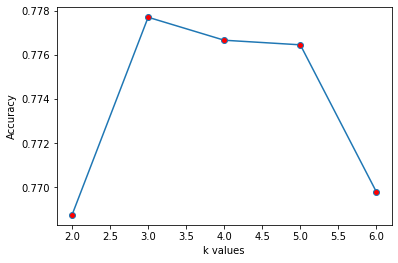

Maximum Accuracy:  0.7777083333333333


In [ ]:
score= [0.76875,0.7777083333333333,0.7766666666666666,0.7764583333333334,0.7697916666666667]
k_val= [2,3,4,5,6]
plt.plot(k_val,score,marker='o',markerfacecolor='red')
plt.xlabel('k values')
plt.ylabel ('Accuracy')   
plt.show()
print('Maximum Accuracy: ',max(score))

# The maximum accuracy is coming at k=3

## Building the model at k=3 and evaluating it on the test set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print('KNN with k=',3)
classifier = KNeighborsClassifier(n_neighbors=3)
classifier = classifier.fit(X_train_array.reshape(X_train_array.shape[0], 100*100), train_target_array)
pred = classifier.predict(X_test_array.reshape(X_test_array.shape[0], 100*100))
accuracy = accuracy_score(test_target_array, pred)
print("Accuracy: ",accuracy)
print("Confusion Matrix:\n", confusion_matrix(test_target_array, pred))

KNN with k= 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy:  0.785593220338983
Confusion Matrix:
 [[  27    1    0    7    0    0    1    0    1   15    7  139    0    0
     0    0    0    2    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0    0   33    0    0
     0    0    0    0    0    0    0    1]
 [   0    0   31    1    0    0    0    0    0    0    0    0    0    0
     4    0    0    0    0    0    0    0]
 [   0    0    0 1061    0    0    0    1    4    0    8    0    0    0
     0    8    0    0   10    0    0    0]
 [   0    0    0    3   37    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  242    0   10    0    3    0    0    1    0
     0    0    0    0    0    0    0    0]
 [   0    0    0   11    0    0  157    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    4    0    1    0  403    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    5    0    1 

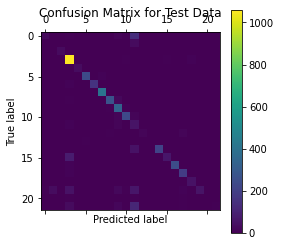

In [ ]:
# Plot Confusion Matrix Data as a Matrix
cf = confusion_matrix(test_target_array, pred)

plt.matshow(cf)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
df['label'].value_counts()

Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Low_Frequency_Lines     447
Extremely_Loud          447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
1400Ripples              81
None_of_the_Above        81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: label, dtype: int64

In [ ]:
target_dict

{'1080Lines': 0,
 '1400Ripples': 1,
 'Air_Compressor': 2,
 'Blip': 3,
 'Chirp': 4,
 'Extremely_Loud': 5,
 'Helix': 6,
 'Koi_Fish': 7,
 'Light_Modulation': 8,
 'Low_Frequency_Burst': 9,
 'Low_Frequency_Lines': 10,
 'No_Glitch': 11,
 'None_of_the_Above': 12,
 'Paired_Doves': 13,
 'Power_Line': 14,
 'Repeating_Blips': 15,
 'Scattered_Light': 16,
 'Scratchy': 17,
 'Tomte': 18,
 'Violin_Mode': 19,
 'Wandering_Line': 20,
 'Whistle': 21}